In [3]:
import scipy.io
import numpy as np
import random
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

 

from matplotlib import pyplot as plt
try:
    import seaborn as sns
    use_seaborn = True
    sns.set()
except:
    use_seaborn = False
!pip install tensor-sensor 

#if np.__version__!="1.16.5":
#    print(f"Your numpy version was {np.__version__}, remember it !!")
#    !pip install numpy==1.16.5
#    print("Please restart your notebook :)")
#try:
#    import tsensor
#except:
#    !pip install tsensor==0.1b1
#    print("Please restart your notebook :)")

  Created wheel for tensor-sensor: filename=tensor_sensor-0.1.1-py3-none-any.whl size=24324 sha256=a70fdeb99036f73971735bd89aa84a8a9a9cef8da447501148247b03b0f74cbb
  Stored in directory: c:\users\bapt9_000\appdata\local\pip\cache\wheels\36\45\83\b79e11702655ccfdf152a62d922910f94b622d8c8decdb0de2
Successfully built tensor-sensor


You should consider upgrading via the 'c:\users\bapt9_000\anaconda3\python.exe -m pip install --upgrade pip' command.


For this exercise we use "tensor-sensor" package, which is usefull for visualizing the dimension of the tensors. Run the following cell only once. Then, you can either remove or comment it. 

# Summary:

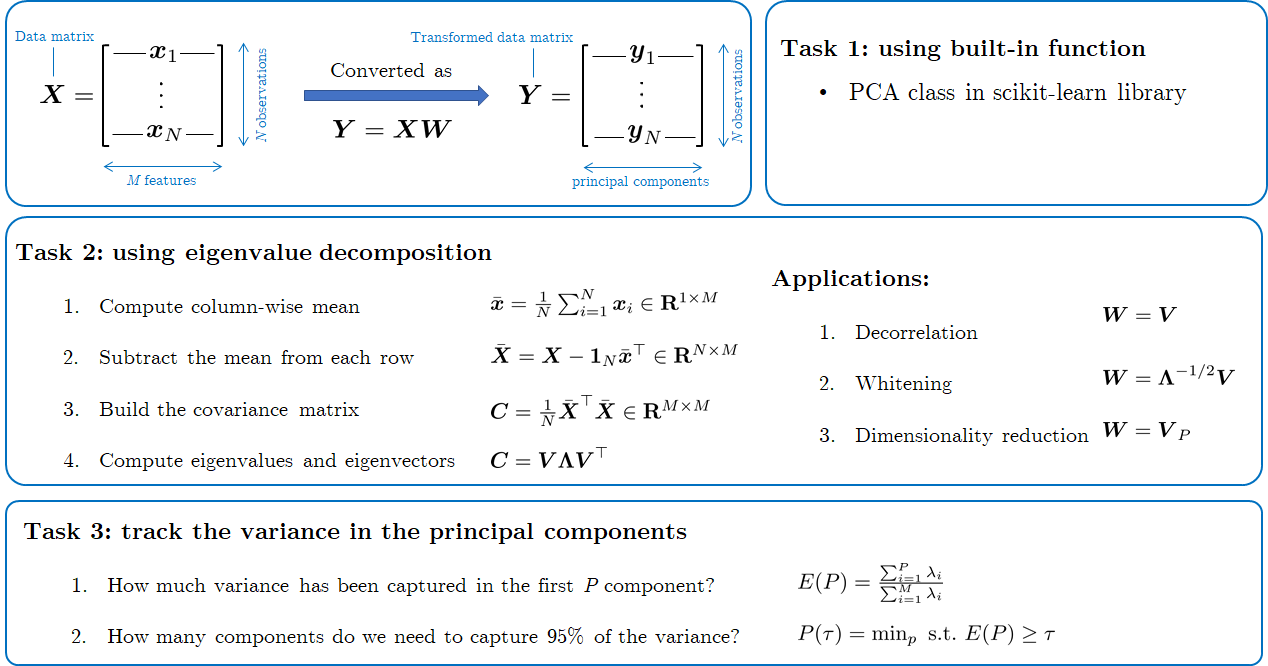

# Warm-up
Let us first load and visualize the data. You will see that our "data" matrix consists of 454 observations in its rows and 2 features in its columns.

However, before applying the PCA, an important step is to apply feature scaling. If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled.

See the link below for more details and an exmple.

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

In the next cell, you need to complete 2 "to do" using "StandardScaler" class from "sklearn" library. 

See the link below for more information about "StandardScaler" class and the image below for the list of available methods you need to work with.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

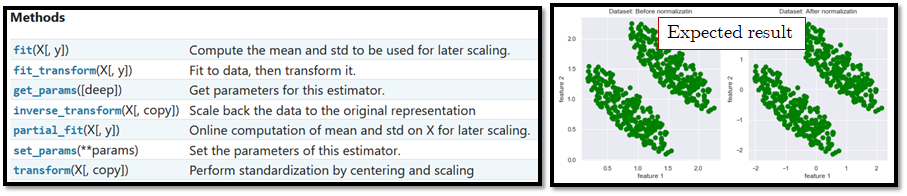

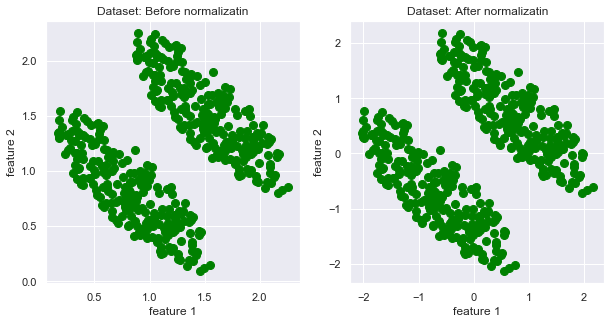

In [16]:
# Loading the data
df = scipy.io.loadmat(f"data1/dataset_{1}.mat")

# To do 1: initiate StandardScaler class
scaler = StandardScaler()


# Taking the data points
data = df['X']
    
# To do 2: Normalize the data using a proper method (choose from the list provided above) of "StandardScaler" class. 

data_normalized  = scaler.fit_transform(data)
    
# ------------- Do not modify the code below  -------------------------------------  
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax1.plot(data[:,0], data[:,1], 'o', markersize=8, color='green', alpha=1)
ax1.set_xlabel('feature 1')
ax1.set_ylabel('feature 2')
ax1.set_title('Dataset: Before normalizatin')
ax1.set_aspect('equal')

ax2 = fig.add_subplot(122)
ax2.plot(data_normalized[:,0], data_normalized[:,1], 'o', markersize=8, color='green', alpha=1)
ax2.set_xlabel('feature 1')
ax2.set_ylabel('feature 2')
ax2.set_title('Dataset: After normalizatin')
ax2.set_aspect('equal')

# Task 1: Use built-in PCA function
Your first task is to calculate a Principal Component Analysis on a dataset using the PCA() class in the scikit-learn library. 

PCA class documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
See the example at the bottom of the page.


Tip: You need to transpose the dataset, before fitting. This PCA class assumes that the data matrix has the features in its columns, while in this course we assume that the features are on the rows of the data matrix. NORMALEMENT PLUS BESOIN

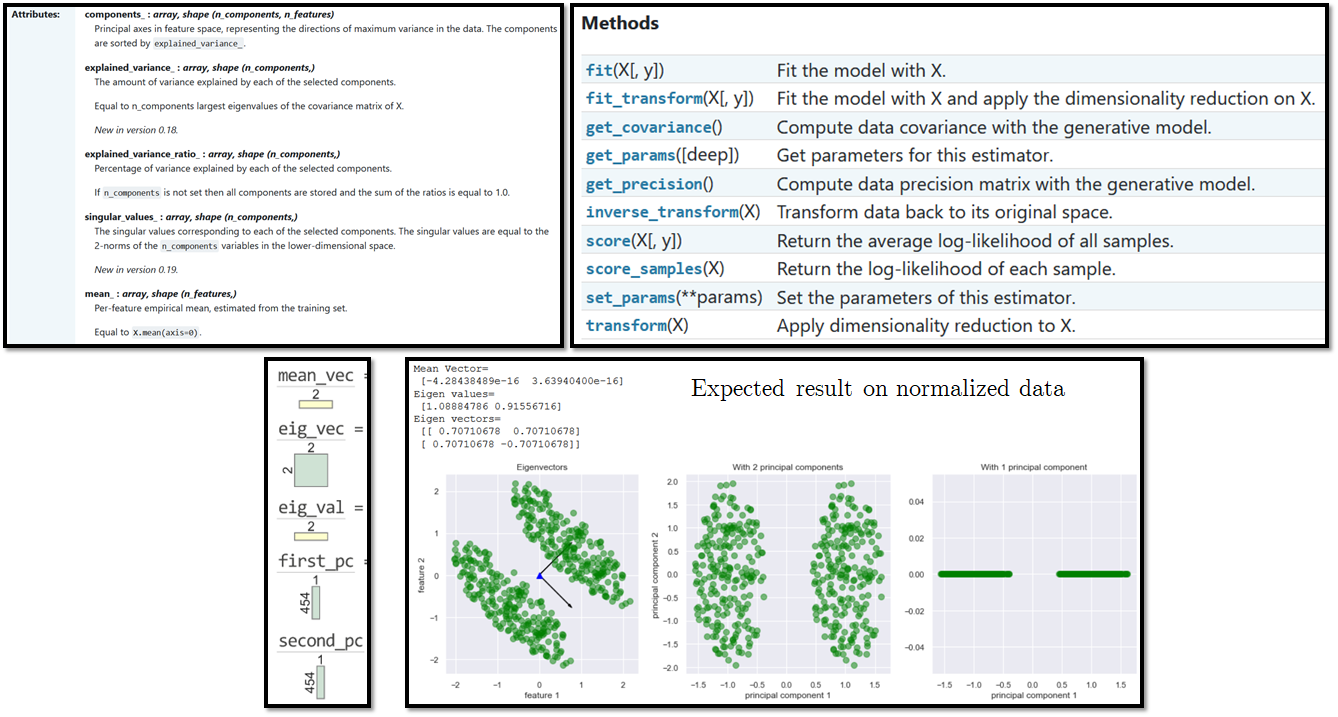

Mean Vector=
 [-4.28438489e-16  3.63940400e-16]
Eigen values=
 [1.08884786 0.91556716]
Eigen vectors=
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


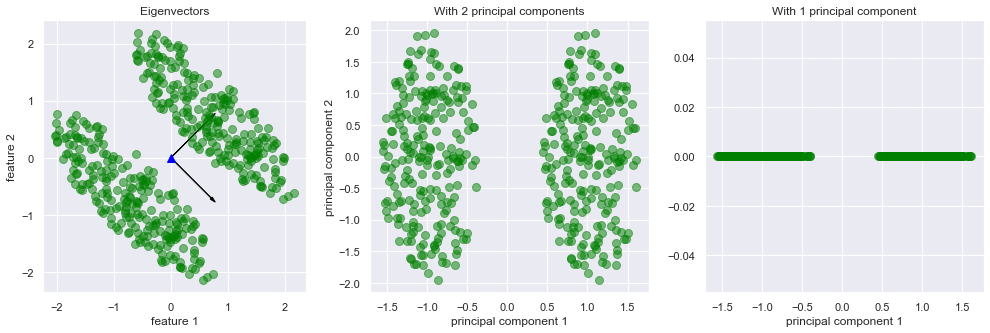

In [21]:
# choose which data you want to work with
#data_ = data.copy()
data_ = data_normalized.copy() #on choisit data normalized !!!!!

# To do 1: create a PCA instance without setting the number of components.
pca = PCA()

# To do 2: fit on data.
#data = pca.fit(data_) ne fonctionnait pas, cause?
# To do 3: transform data. 
data_transformed = pca.fit_transform(data_) #fonctionne avec fit et transform combinés

# To do 4: access to the feature-wise mean vector
mean_vec = pca.mean_

# To do 5: access the principal axes in feature space. Question: do you need to transpose the output?
eig_vec = pca.components_

# To do 6: access the amount of variance explained by each of the selected components
eig_val = pca.explained_variance_

# To do 7: Access to the first and the second principal component of the transformed data. 
# We want to visualize them. The size should be 454x1.
first_pc = data_transformed[:,0][:,None] #[:,0] add a dimension to be 454x1 (1)
second_pc = data_transformed[:,1][:,None] 
#--------------- Do not modify the code below ------------
print('Mean Vector=\n', mean_vec)
print('Eigen values=\n', eig_val)
print('Eigen vectors=\n', eig_vec)

fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)
ax1.plot(data_[:,0], data_[:,1], 'o', markersize=8, color='green', alpha=0.5)
ax1.plot(mean_vec[0], mean_vec[1], '^', markersize=8, color='blue', alpha=1)
for v in eig_vec:
    ax1.arrow(mean_vec[0],mean_vec[1],v[0],v[1], color='black', head_width=0.05, head_length=0.1,)
ax1.set_xlabel('feature 1')
ax1.set_ylabel('feature 2')
ax1.set_title('Eigenvectors')
ax1.set_aspect('equal')

ax2 = fig.add_subplot(132)
ax2.plot(first_pc, second_pc, 'o', markersize=8, color='green', alpha=0.5)

ax2.set_xlabel('principal component 1')
ax2.set_ylabel('principal component 2')
ax2.set_title('With 2 principal components')


ax3 = fig.add_subplot(133)
ax3.plot(first_pc,np.zeros((data_.shape[0],1)), 'o', markersize=8, color='green', alpha=0.5) #modifié data en data_ vu que je passe pas par data

ax3.set_xlabel('principal component 1')
ax3.set_title('With 1 principal component')
plt.show()
#--------------- Do not modify the code above ------------

# Task 2 (a): step-by-step implementation of your PCA function
Your second task is to implement the steps of the PCA algorithm and then build your own PCA function.

You have 6 to do items.

Question: Do your results match with those obtained above (with the PCA class in the scikit-learn library)?

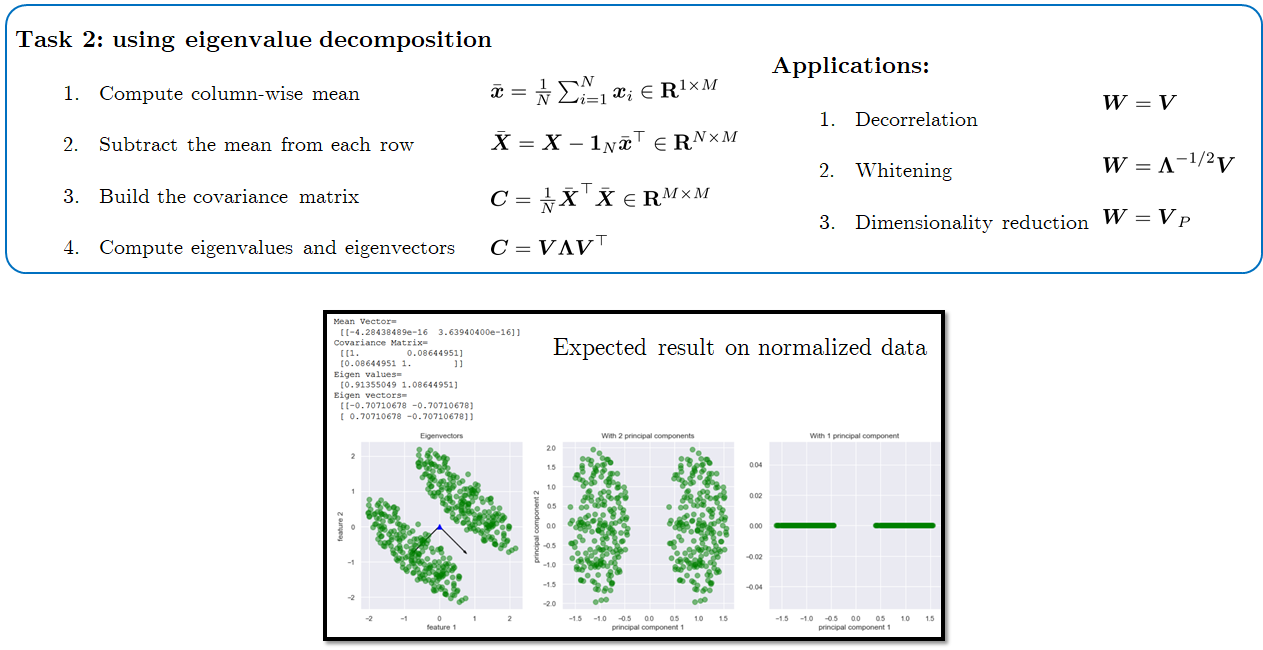

Mean Vector=
 [[-4.28438489e-16  3.63940400e-16]]
Covariance Matrix=
 [[1.         0.08644951]
 [0.08644951 1.        ]]
Eigen values=
 [1.08644951 0.91355049]
Eigen vectors=
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


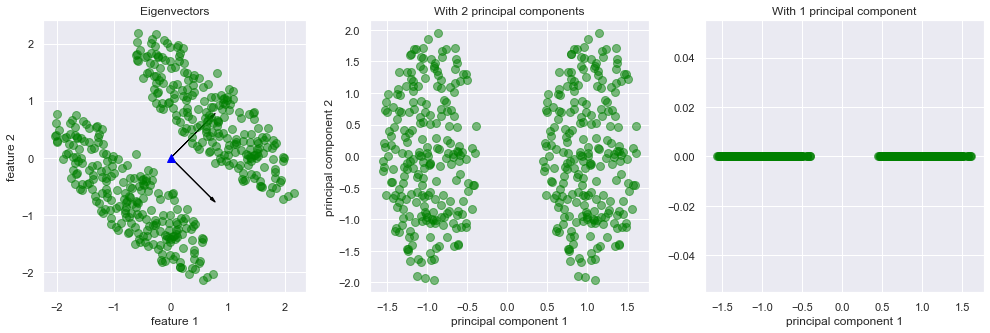

In [24]:
# choose which data you want to work with
#data_ = data.copy()
data_ = data_normalized.copy()


# To do 1: compute the mean of along each feature. The size should be 1x2.
mean_vec = np.mean(data_,axis=0)[None,:]
    
# To to 2: remove the mean from each column. The size should be 454x2.
data_mean_removed = data_ - mean_vec
    
# To do 3: compute the covariance matrix. The size should be 2x2.
cov_matrix = (data_mean_removed.T@data_mean_removed)/len(data_)
    
# To do 4: compute the eigenvectors and eigenvalues for the covariance matrix. The size should be 1x2 and 2x2, respectively.
eig_val, eig_vec = np.linalg.eig(cov_matrix)
    
#To do 5: sort the eigenvalues and eigen vectors according to the descending order of eigenvalues.
sorted_indices = np.flip(np.argsort(eig_val))
eig_val_sorted = eig_val[sorted_indices]
eig_vec_sorted = eig_vec[:,sorted_indices]
    
#To do 6: transform the data by applying the sorted eigenvector matrix. The size should be 2x454.
data_transformed = data_@eig_vec_sorted
    
# To do 7: Access to the first and the second principal component of the transformed data. We want to visualize them.
first_pc = data_transformed[:,0][:,None]
second_pc = data_transformed[:,1][:,None]
    
#--------------- Do not modify the code below ------------
print('Mean Vector=\n', mean_vec)
print('Covariance Matrix=\n', cov_matrix)
print('Eigen values=\n', eig_val)
print('Eigen vectors=\n', eig_vec)

fig = plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(131)
ax1.plot(data_[:,0], data_[:,1], 'o', markersize=8, color='green', alpha=0.5)
ax1.plot(mean_vec[0,0], mean_vec[0,1], '^', markersize=8, color='blue', alpha=1)
for v in eig_vec:
    ax1.arrow(mean_vec[0,0],mean_vec[0,1],v[0],v[1], color='black', head_width=0.05, head_length=0.1,)
ax1.set_xlabel('feature 1')
ax1.set_ylabel('feature 2')
ax1.set_title('Eigenvectors')
ax1.set_aspect('equal')

ax2 = fig.add_subplot(132)
ax2.plot(first_pc, second_pc, 'o', markersize=8, color='green', alpha=0.5)

ax2.set_xlabel('principal component 1')
ax2.set_ylabel('principal component 2')
ax2.set_title('With 2 principal components')


ax3 = fig.add_subplot(133)
ax3.plot(first_pc,np.zeros((data_.shape[0],1)), 'o', markersize=8, color='green', alpha=0.5)

ax3.set_xlabel('principal component 1')
ax3.set_title('With 1 principal component')
plt.show()
#--------------- Do not modify the code above ------------

# Task 2 (b): Creat your standalone PCA class
Now you can copy-paste the steps you implemented above in the cell below and create your own PCA Class. We also ask you to implement whitening whithin "fit" method.

In [31]:
class MyPCA():
    def __init__(self, n_components, whiten=False):
        self.n_comps = n_components
        self.whiten = whiten
        
    # Fit the model with X
    def fit(self, X):
        X = X.copy()
        # To do 1: Compute the sorted eigen values and vectors
        mean_vec = np.mean(data_,axis=0)[None,:]
        data_mean_removed = data_ - mean_vec
        cov_matrix = (data_mean_removed.T@data_mean_removed)/len(data_)
        eig_val, eig_vec = np.linalg.eig(cov_matrix)
        sorted_indices = np.flip(np.argsort(eig_val))
        self.eig_val = eig_val[sorted_indices]
        self.eig_vec = eig_vec[:,sorted_indices]
        # To do 2: modify "self.eig_vec" such that it can be used for whitening
        if self.whiten:
            pass

        
        # To do 3: pick only the first "n_components" of the eigenvector matrix.
        self.eig_vec = self.eig_vec[:,:self.n_comps]
        
        return self
    
    # Apply PCA on X
    def transform(self, X):
        #To do 4: transform the data by applying the sorted eigenvector matrix.
        return X@ self.eig_vec
    
    # To do 5: Return the sorted eigenvalues and vectors
    def eigens(self,X):
        return self.eig_val,self.eig_vec
    
    # To do 6: Fit the model on X and apply PCA. 
    def fit_transform(self, X):
        return self.fit(X).transform(X)
    

# Task 3: Track the variance of principal components

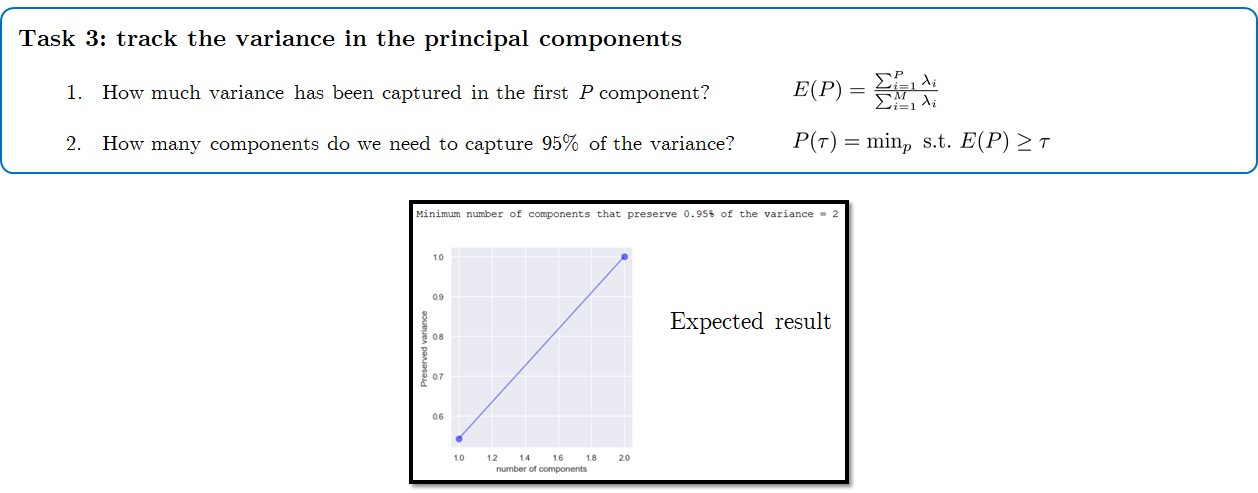


In [33]:
# choose which data you want to work with
#data_ = data.copy()
data_ = data_normalized.copy()

# threshold. Will be used for step 2 of this task.
tau = 0.95

# To do 1: use "MyPCA" class you wrote before and get the sorted eigenvalues. 
# Question: What would be the value of "n_components" that you need to set for this task? 1, 2, or the number of features?
pca=MyPCA(n_components=2)
data = pca.fit(data_)
eig_val,eig_vec = pca.eigens(data)
print(eig_val)


    
# To do 2: Compute an array E, where E(P) indicates the variance captured in the first P component.
E = ...
    
# To do 3: Find the minimum P that captures \tau portion of the variance. Note: P should be a scalar.
P = ...
    
#--------------- Do not modify the code below ------------    
print('Minimum number of components that preserve {} of the variance = {} \n' .format(tau,P))
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)
ax.plot(np.arange(1,E.shape[0]+1), E, 'o-', markersize=8, color='blue', alpha=0.5)
ax.set_xlabel('number of components')
ax.set_ylabel('Preserved variance')
plt.show()
#--------------- Do not modify the code above ------------

TypeError: __init__() missing 1 required positional argument: 'n_components'

# Task 4: apply PCA on a real data set of breast cancer

The Breast Cancer data set consists of two classes: malignant and benign,i.e., whether a patient has breast cancer or not, respectively. 

The malignant (and benign) class has 212 (respectively, 357) samples.

The data set has 30 features, e.g., radius, texture, perimeter, area, smoothness, fractal dimension, etc.

Take your time to understand the steps below.

In [26]:
# load data
import pandas as pd
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()
    
# To get the data, we call ".data" and for getting the labels we call ".target".
breast_data = breast.data
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))

# we concatenate the data and labels along the second axis,
# which means the final shape of the array will be 569 x 31.
final_breast_data = np.concatenate([breast_data,labels],axis=1)

breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names

features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

# The original labels are  0,1. We change the labels to benign and malignant.  
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)


# print the last few rows of the breast_dataset.
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


You are now expected to recycle the codes you wrote in the previous cells in order to reduce the dimension of the Breast Cancer data set and visualize it. We expect you to generate the following plot.
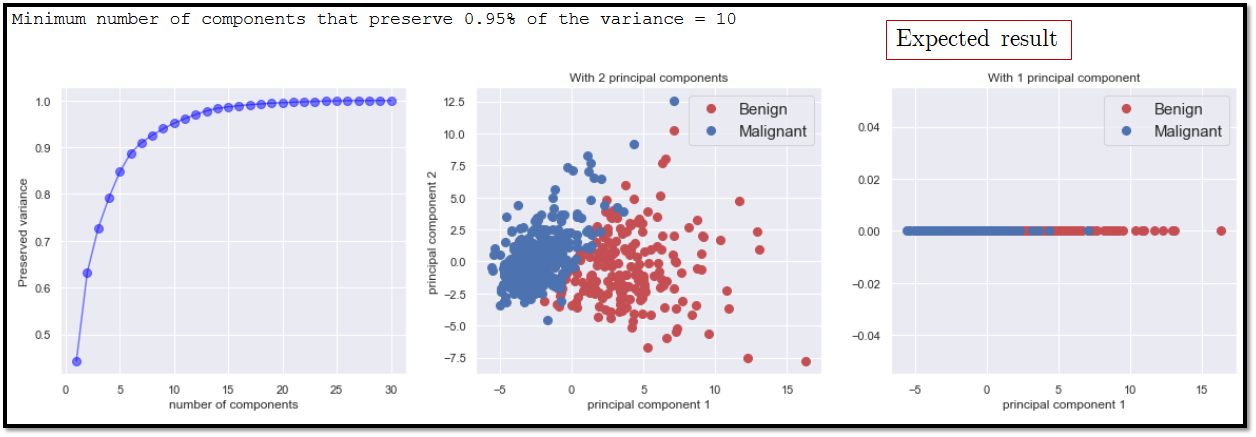

In [ ]:
# To do 1: Normalize the data, as you did in "warm-up".
# What is our data for this task? "breast_data", "final_breast_data", or "breast_dataset"?


    
data_normalized = 
    

# To do 2: apply PCA on the data using "MyPCA()" class you wrote

data_transformed = 


# To do 3: Access to the first and the second principal component of the transformed data. We want to visualize them.
first_pc = 
second_pc = 

# To do 4: Compute an array E, where E(P) indicates the variance captured in the first P component.
E = 

# threshold
tau = 0.95

# To do 5: Find the minimum P that captures \tau portion of the variance
P = 
    
#--------------- Do not modify the code below ------------    
print('Minimum number of components that preserve {} of the variance = {} \n' .format(tau,P))
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131)
ax1.plot(np.arange(1,E.shape[0]+1), E, 'o-', markersize=8, color='blue', alpha=0.5)
ax1.set_xlabel('number of components')
ax1.set_ylabel('Preserved variance')

ax2 = fig.add_subplot(132)
targets = ['Benign', 'Malignant']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    ax2.plot(first_pc[indicesToKeep], second_pc[indicesToKeep], 'o', markersize=8, c = color, alpha=1)

ax2.legend(targets,prop={'size': 15})

#ax2.plot(first_pc[indicesToKeep], second_pc[indicesToKeep], 'o', markersize=8, color='green', alpha=0.5)

ax2.set_xlabel('principal component 1')
ax2.set_ylabel('principal component 2')
ax2.set_title('With 2 principal components')


ax3 = fig.add_subplot(133)
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    ax3.plot(first_pc[indicesToKeep],np.zeros((np.sum(indicesToKeep),1)), 'o', markersize=8, c = color, alpha=1)

ax3.legend(targets,prop={'size': 15})
ax3.set_xlabel('principal component 1')
ax3.set_title('With 1 principal component')
plt.show()
#--------------- Do not modify the code above ------------

## Task 4: An application of ICA in blind source separation

In this task you will use a built-in ICA class in scikit-learn library. 

We are aware that this part has not been taught in the class. However, this practice will give an overview of the context and a hands-on experience for applying such a method on a source separation problem.
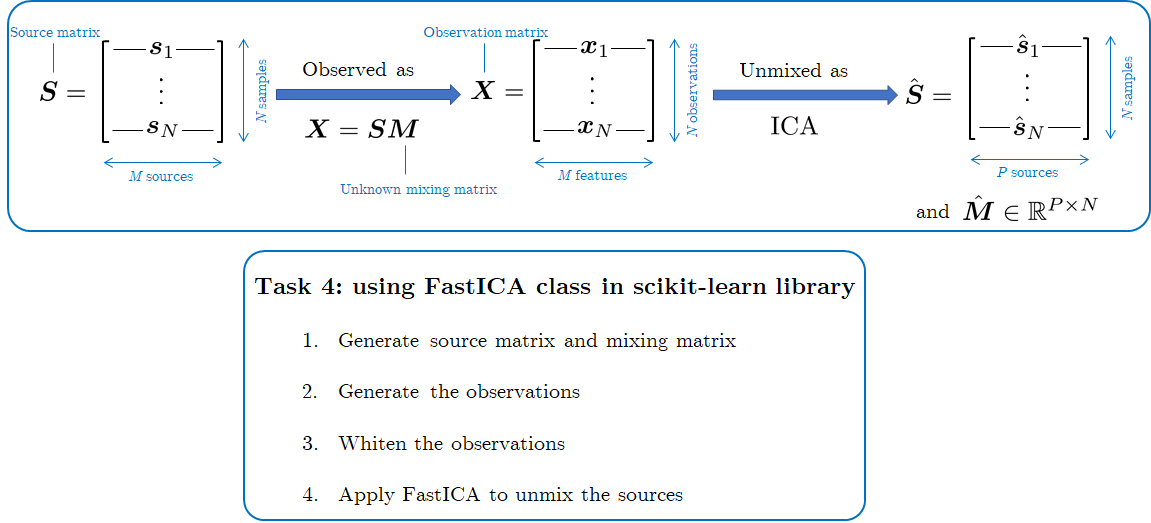

In [ ]:
# In this cell we generate 3 source and visualize them
# You do not need to modify the code below. If interested, you can try different signal shape on your own.
from scipy import signal
from sklearn.decomposition import FastICA, PCA


n_samples = 2000
time = np.linspace(0, 8, n_samples)
s1 = np.sin(2 * time)  # sinusoidal
s2 = np.sign(np.sin(3 * time))  # square signal
s3 = signal.sawtooth(2 * np.pi * time)  # saw tooth signal


fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(311)
ax1.plot(s1, '-', linewidth=4, color='blue')
ax1.set_title('s1: sinusoidal')

ax2 = fig.add_subplot(312)
ax2.plot(s2, '-', linewidth=4, color='red')
ax2.set_title('s2: square signal')

ax3 = fig.add_subplot(313)
ax3.plot(s3, '-', linewidth=4, color='green')
ax3.set_title('s3: saw tooth signal')

plt.show()

In the next cell, you need to complete ... tasks. Moreover, we suggest you to read every line of the code and try to change the signals and mixing matrix and observe the result of the ICA algorithm.

For this task you need to use FastICA class, see the link below and use the required methods to complete the task.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html

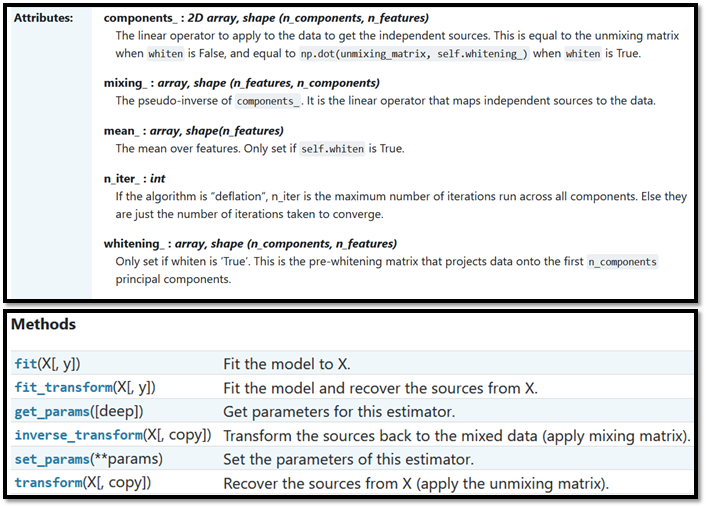

In [ ]:
with tsensor.explain():
    # Create the source matrix
    S = np.c_[s1, s2, s3]

# Add noise. To start, consider the noiseless case. Once implemented, set a non-zero noise variance.
S += 0. * np.random.normal(size=S.shape)

# To do 1: Standardize the source matrix

S = 

with tsensor.explain():
    # Create the mixing matrix. Try different matrices here and see the results.
    M = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  

    # To do 2: Mix the sources using the mixng matrix
    X = 

    # To do 3: Whiten the observations using "MyPCA" class
    X_white = 
    
    # To do 4: Create an instance of FastICA with 3 components.     

    # To do 5: reconstruct the source signals
    S_hat = 

    # To do 6: estimate the unknown mixing matrix
    M_hat = 

# To do 7: compute the reconstruction error.
# Question: which type of error should you consider here?
print("Reconstruction error = ")

# To do 8: For comparison, apply PCA (with 3 component) on the whitened observation

S_hat_pca = 

# --------------------- Do not modify the code below --------------------------

plt.figure(figsize=(10,10))

models = [X, S, S_hat, S_hat_pca]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()